# Bright Motor Company  Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [3]:
dataset = pd.read_csv("C:\\Users\\hpw\\OneDrive\\Desktop\\bright_automotive_company.csv")

In [4]:
dataset.head()

Age  Gender Profession Marital_status      Education No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                4   
1   53   Femal   Salaried        Married  Post Graduate                4   
2   53  Female   Salaried        Married  Post Graduate                3   
3   53  Female   Salaried        Married       Graduate                ?   
4   53    Male        NaN        Married  Post Graduate                3   

  Personal_loan House_loan Partner_working   Salary  Partner_salary  \
0            No         No             Yes  99300.0         70700.0   
1           Yes         No             Yes  95500.0         70300.0   
2            No         No             Yes  97300.0         60700.0   
3           Yes         No             Yes  72500.0         70300.0   
4            No         No             Yes  79700.0         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000    ?  
4        139900  57000  SUV

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


In [6]:
dataset.describe()

Age        Salary  Partner_salary   Total_salary          Price
count  1581.000000   1568.000000     1475.000000    1581.000000    1581.000000
mean     31.952562  60276.913265    20225.559322   79625.996205   35948.170778
std       8.712549  14636.200199    19573.149277   25545.857768   21175.212108
min      14.000000  30000.000000        0.000000   30000.000000      58.000000
25%      25.000000  51900.000000        0.000000   60500.000000   25000.000000
50%      29.000000  59450.000000    25600.000000   78000.000000   31000.000000
75%      38.000000  71700.000000    38300.000000   95900.000000   47000.000000
max     120.000000  99300.000000    80500.000000  171000.000000  680000.000000

In [7]:
dataset.shape

(1581, 14)

In [8]:
dataset.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

# Checking for outliers and null values


In [10]:
print(dataset.isnull().values.any())

True


In [11]:
print(dataset.isnull().sum())

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


In [12]:
print(dataset.duplicated().sum())

0


In [13]:
print("Age anomalies:")
print(dataset['Age'].describe())
invalid_age = dataset[(dataset['Age'] < 18) | (dataset['Age'] > 80)]
print(f"\n{len(invalid_age)} invalid age records (outside 18-80 range)")

Age anomalies:
count    1581.000000
mean       31.952562
std         8.712549
min        14.000000
25%        25.000000
50%        29.000000
75%        38.000000
max       120.000000
Name: Age, dtype: float64

2 invalid age records (outside 18-80 range)


In [14]:
print("\nGender value counts:")
print(dataset['Gender'].value_counts(dropna=False))


Gender value counts:
Gender
Male      1199
Female     327
NaN         53
Femal        1
Femle        1
Name: count, dtype: int64


In [15]:
Q1 = dataset['Salary'].quantile(0.25)
Q3 = dataset['Salary'].quantile(0.75)
IQR = Q3 - Q1
salary_outliers = dataset[(dataset['Salary'] < (Q1 - 1.5*IQR)) | 
                  (dataset['Salary'] > (Q3 + 1.5*IQR))]
print(f"\n{len(salary_outliers)} salary outliers detected")


0 salary outliers detected


In [16]:
print("\nAutomobile make anomalies:")
print(dataset['Make'].value_counts())


Automobile make anomalies:
Make
Sedan        702
Hatchback    582
SUV          295
?              2
Name: count, dtype: int64


# Data Cleaning

In [18]:
print("Null values before imputation:\n", dataset.isnull().sum())
dataset['Salary'].fillna(dataset['Salary'].median(), inplace=True)
dataset['Partner_salary'].fillna(0, inplace=True) 
dataset['Total_salary'] = dataset['Salary'] + dataset['Partner_salary']
categorical_cols = ['Gender', 'Profession', 'Marital_status', 'Education', 
                    'Personal_loan', 'House_loan', 'Partner_working']
for col in categorical_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)
print("Null values after imputation:\n", dataset.isnull().sum())

Null values before imputation:
 Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64
Null values after imputation:
 Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64


In [19]:
dataset.drop(columns=[col for col in dataset.columns if 'unnamed' in col.lower()], inplace=True)

In [20]:
dataset['Age'] = dataset['Age'].clip(18, 80)

In [21]:
dataset['Gender'] = dataset['Gender'].replace({ 'Femal': 'Female', 'Femle': 'Female'}).str.title()  
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)

In [22]:
dataset['Make'] = dataset['Make'].replace('?', 'Sedan')

In [23]:
dataset['Price'] = dataset['Price'].clip(upper=100000)

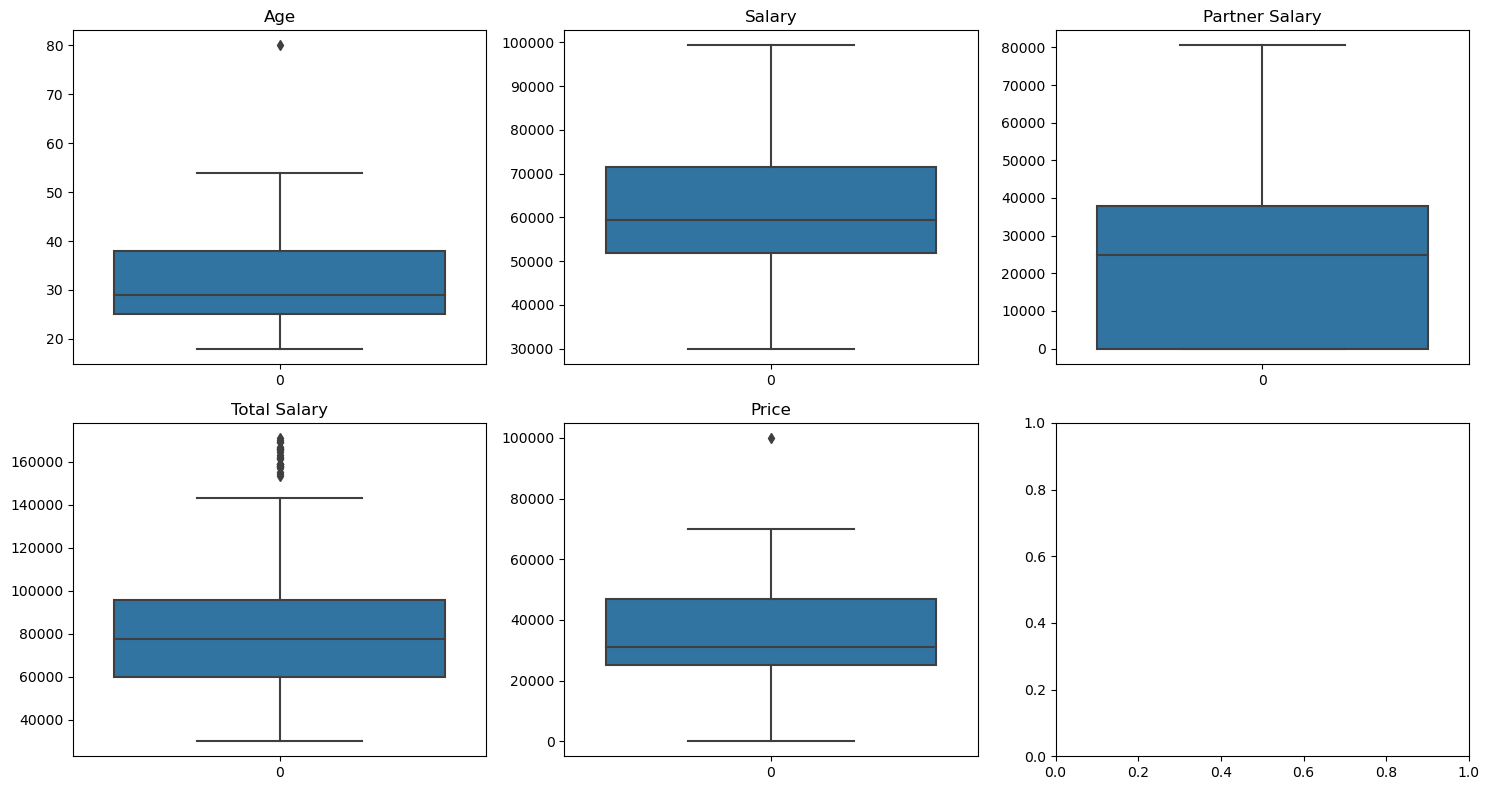

In [45]:
fig, ax = plt.subplots(2, 3, figsize=(15,8))
sns.boxplot(dataset['Age'], ax=ax[0,0]).set_title('Age')
sns.boxplot(dataset['Salary'], ax=ax[0,1]).set_title('Salary')
sns.boxplot(dataset['Partner_salary'], ax=ax[0,2]).set_title('Partner Salary')
sns.boxplot(dataset['Total_salary'], ax=ax[1,0]).set_title('Total Salary')
sns.boxplot(dataset['Price'], ax=ax[1,1]).set_title('Price')
plt.tight_layout()

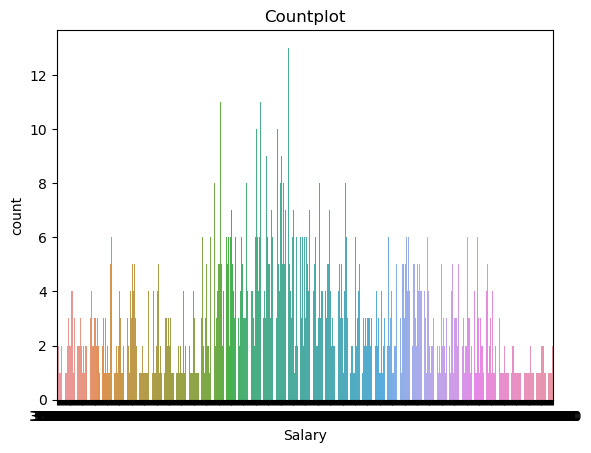

In [47]:
sns.countplot(x="Salary",data=dataset)
plt.title("Countplot")
plt.show()

In [49]:
correlation = dataset.corr(numeric_only=True)
print(correlation)

                     Age    Salary  Partner_salary  Total_salary     Price
Age             1.000000  0.600024        0.124503      0.440090  0.786046
Salary          0.600024  1.000000        0.087960      0.641387  0.397028
Partner_salary  0.124503  0.087960        1.000000      0.820660  0.158186
Total_salary    0.440090  0.641387        0.820660      1.000000  0.349587
Price           0.786046  0.397028        0.158186      0.349587  1.000000


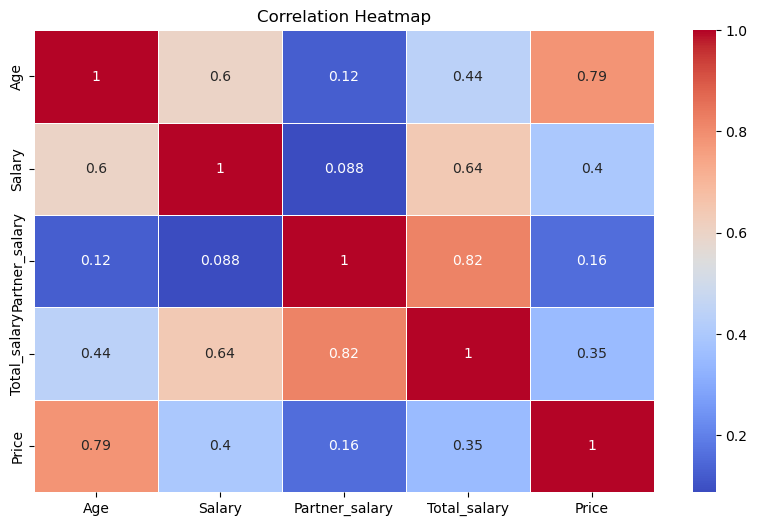

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

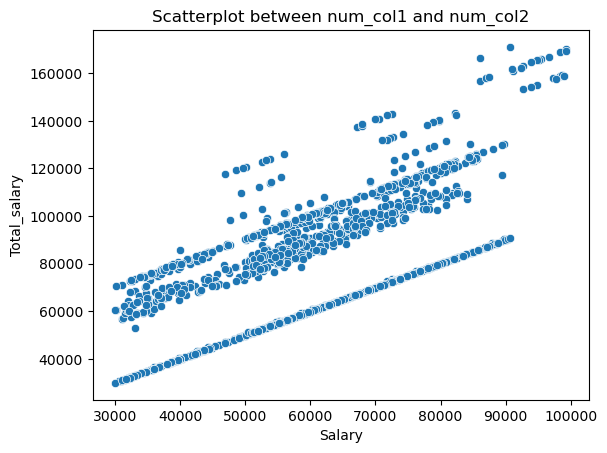

In [53]:
sns.scatterplot(x='Salary', y='Total_salary', data=dataset)
plt.title("Scatterplot between num_col1 and num_col2")
plt.show()

# Descriptive Statistics: What are the mean, median, and standard deviation of the ages of individuals in the dataset?


In [55]:
age_stats = dataset['Age'].agg(['mean', 'median', 'std'])
print(f"""Age Statistics:- Mean: {age_stats['mean']:.2f} years- Median: {age_stats['median']:.2f} years
- Standard Deviation: {age_stats['std']:.2f} years""")

Age Statistics:- Mean: 31.93 years- Median: 29.00 years
- Standard Deviation: 8.51 years


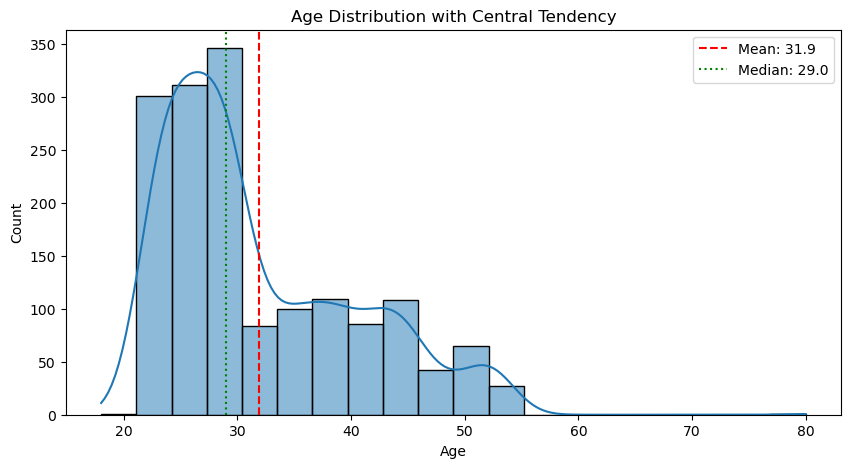

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(dataset['Age'], kde=True, bins=20)
plt.axvline(age_stats['mean'], color='r', linestyle='--', label=f'Mean: {age_stats["mean"]:.1f}')
plt.axvline(age_stats['median'], color='g', linestyle=':', label=f'Median: {age_stats["median"]:.1f}')
plt.title('Age Distribution with Central Tendency')
plt.legend()
plt.show()

# •	Data Distribution: What is the distribution of gender in the dataset? Represent it using a pie chart.


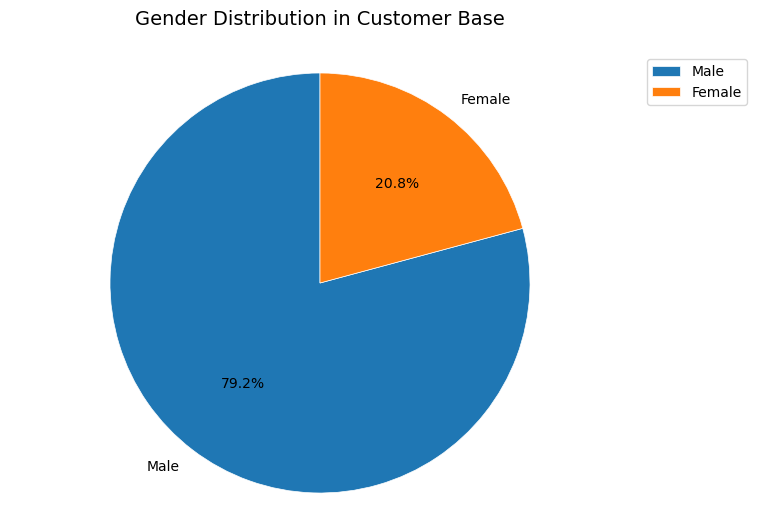

In [59]:
gender_counts = dataset['Gender'].value_counts()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] 
plt.figure(figsize=(8,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',startangle=90,colors=colors,wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
plt.title('Gender Distribution in Customer Base', pad=20, fontsize=14)
plt.axis('equal')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# •	Correlation Analysis: Is there a correlation between age and salary? Provide the correlation coefficient and interpret the result.


In [64]:
correlation = dataset['Age'].corr(dataset['Salary'])
print(f"Correlation between Age and Salary: {correlation:.2f}")

# Interpretation
if correlation > 0.5:
    print("→ Strong positive correlation: Older individuals tend to have higher salaries.")
elif correlation > 0.3:
    print("→ Moderate positive correlation: Age somewhat increases with salary.")
elif correlation > 0:
    print("→ Weak positive correlation: Slight increase in salary with age.")
elif correlation < 0:
    print("→ Negative correlation: As age increases, salary decreases.")
else:
    print("→ No correlation between age and salary.")

Correlation between Age and Salary: 0.60
→ Strong positive correlation: Older individuals tend to have higher salaries.


# Salary Analysis: What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)?


In [67]:
average_salary_by_education = dataset.groupby('Education')['Salary'].mean()
print(average_salary_by_education)

Education
Graduate         48514.597315
Post Graduate    67383.096447
Name: Salary, dtype: float64


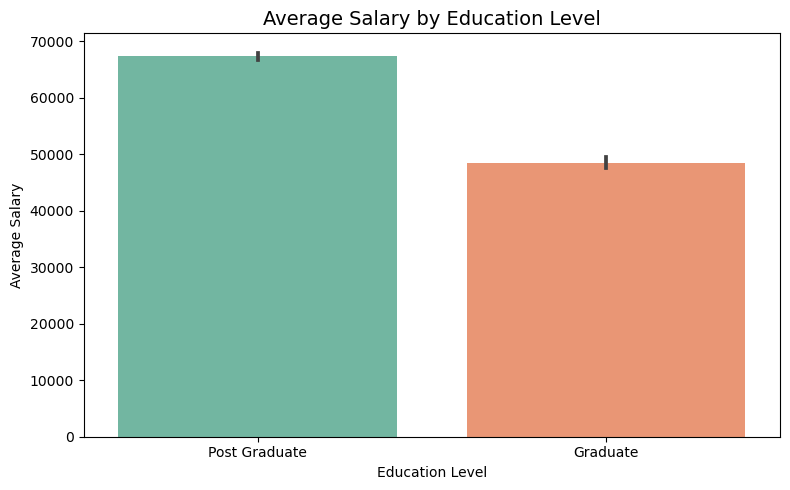

In [69]:
dataset['Education'] = dataset['Education'].str.strip().str.title()
plt.figure(figsize=(8,5))
sns.barplot(x='Education', y='Salary', data=dataset, estimator='mean', palette='Set2')
plt.title('Average Salary by Education Level', fontsize=14)
plt.ylabel('Average Salary')
plt.xlabel('Education Level')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [71]:
# Normalize Education column (if not done already)
dataset['Education'] = dataset['Education'].str.strip().str.title()

# Calculate average salary by Education
avg_salary = dataset.groupby('Education')['Salary'].mean()

graduate_salary = avg_salary.get('Graduate', np.nan)
postgraduate_salary = avg_salary.get('Post Graduate', np.nan)

percentage_increase = ((postgraduate_salary - graduate_salary) / graduate_salary) * 100

print(f"Average Salary for Graduates: {graduate_salary:.2f}")
print(f"Average Salary for Post Graduates: {postgraduate_salary:.2f}")
print(f"Post Graduates earn {percentage_increase:.2f}% more than Graduates on average.")

Average Salary for Graduates: 48514.60
Average Salary for Post Graduates: 67383.10
Post Graduates earn 38.89% more than Graduates on average.


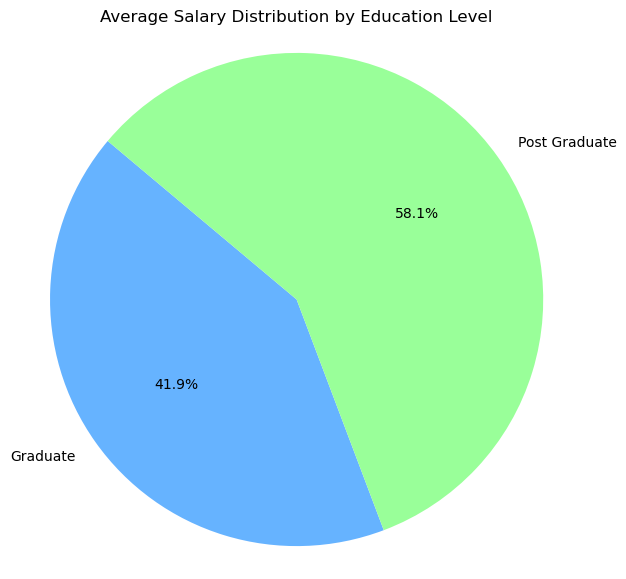

In [73]:
import matplotlib.pyplot as plt
labels = avg_salary.index
sizes = avg_salary.values

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Average Salary Distribution by Education Level')
plt.axis('equal') 

plt.show()

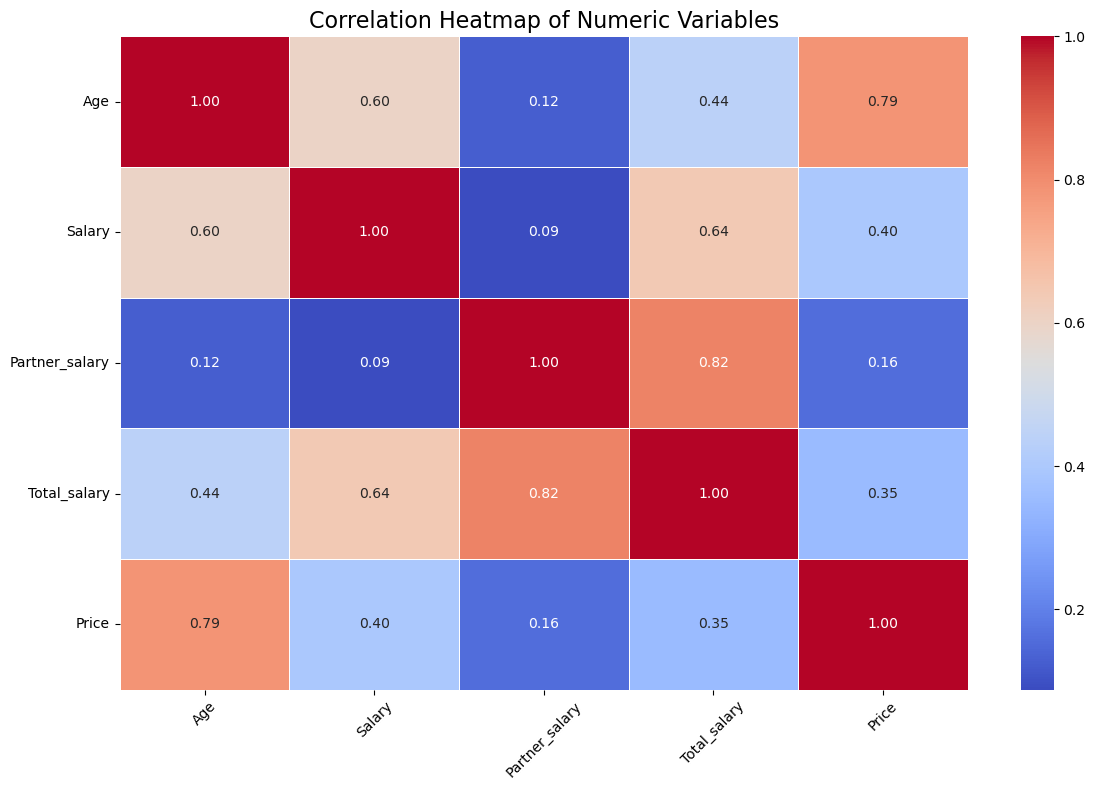

In [75]:
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
numeric_dataset = dataset[numeric_cols]

# Calculate correlation matrix
correlation_matrix = numeric_dataset.corr()

# Set the size and style of the plot
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title and adjust layout
plt.title("Correlation Heatmap of Numeric Variables", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 	Loan Status:What percentage of individuals have taken a personal loan? How does this compare between males and females?


In [78]:
loan_counts = dataset['Personal_loan'].value_counts(normalize=True) * 100
print(loan_counts)

Personal_loan
Yes    50.094877
No     49.905123
Name: proportion, dtype: float64


In [80]:
loan_by_gender = dataset.groupby(['Gender', 'Personal_loan']).size().unstack()
loan_by_gender_percent = loan_by_gender.div(loan_by_gender.sum(axis=1), axis=0) * 100
print(loan_by_gender_percent)

Personal_loan         No        Yes
Gender                             
Female         54.711246  45.288754
Male           48.642173  51.357827


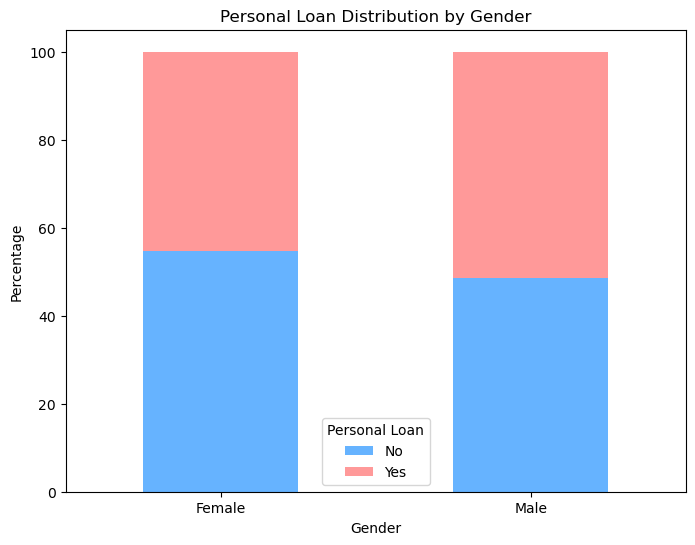

In [82]:
loan_by_gender_percent.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'], figsize=(8, 6))
plt.title('Personal Loan Distribution by Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Personal Loan')
plt.show()

In [84]:
print(loan_by_gender_percent.columns)

Index(['No', 'Yes'], dtype='object', name='Personal_loan')


In [86]:
male_loan_pct = loan_by_gender_percent.loc['Male', 'Yes']
female_loan_pct = loan_by_gender_percent.loc['Female', 'Yes']

In [88]:
# Calculate percentage distribution of Personal Loan by Gender
loan_by_gender_percent = dataset.groupby(['Gender', 'Personal_loan']).size().unstack()
loan_by_gender_percent = loan_by_gender_percent.div(loan_by_gender_percent.sum(axis=1), axis=0) * 100

# Extract loan % values correctly using string labels
male_loan_pct = loan_by_gender_percent.loc['Male', 'Yes']
female_loan_pct = loan_by_gender_percent.loc['Female', 'Yes']

# Compute difference
difference = male_loan_pct - female_loan_pct

# Count individuals by gender
gender_counts = dataset['Gender'].value_counts()

# Output
print(f"Total Males: {gender_counts.get('Male', 0)}")
print(f"Total Females: {gender_counts.get('Female', 0)}")
print(f"\nPercentage of Males with Personal Loan: {male_loan_pct:.2f}%")
print(f"Percentage of Females with Personal Loan: {female_loan_pct:.2f}%")

Total Males: 1252
Total Females: 329

Percentage of Males with Personal Loan: 51.36%
Percentage of Females with Personal Loan: 45.29%


# Marital Status and Dependents:What is the average number of dependents for married individuals versus single individuals?


In [95]:
dataset['No_of_Dependents'] = pd.to_numeric(dataset['No_of_Dependents'], errors='coerce')

In [97]:
print(dataset['No_of_Dependents'].isna().sum())

2


In [99]:
# Calculate average number of dependents grouped by marital status
avg_dependents_by_marital_status = dataset.groupby('Marital_status')['No_of_Dependents'].mean()
# Output
print("Average Number of Dependents:")
print(f"Married: {avg_dependents_by_marital_status.get('Married', 0):.2f}")
print(f"Single: {avg_dependents_by_marital_status.get('Single', 0):.2f}")

Average Number of Dependents:
Married: 2.54
Single: 1.61


# 	Partner Employment:How does the employment status of a partner affect the total combined salary?


In [102]:
avg_salary_by_partner_status = dataset.groupby('Partner_working')['Salary'].mean()

# Output
print("Average Individual Salary based on Partner's Employment Status:")
print(f"Partner Working: {avg_salary_by_partner_status.get('Yes', 0):.2f}")
print(f"Partner Not Working: {avg_salary_by_partner_status.get('No', 0):.2f}")

Average Individual Salary based on Partner's Employment Status:
Partner Working: 60281.34
Partner Not Working: 60256.45


In [104]:
avg_total_salary_by_partner_status = dataset.groupby('Partner_working')['Total_salary'].mean()
print(avg_total_salary_by_partner_status.round(2))

Partner_working
No     60256.45
Yes    94650.81
Name: Total_salary, dtype: float64
